# KDD - Task 2 - NLP

### Student:
* Lucas Bezerra Maia

#### Tasks

* Preprocesses a piece of text (only what is useful);
* Identifies entities and their categories;
* Performs semantic role labeling (SRL);
* Extracts keywords;
* Obtains simple word embeddings;
* Visualizes some words using word embeddings (2 dimensional or use t-SNE)

### Summary

* Imports
* Functions
* Execution of the functions answering the tasks

### Library Imports and Settings

In [ ]:
import re
import nltk
import pandas as pd
import benepar
import matplotlib.pyplot as plt
import spacy
import yake
import numpy as np
import warnings

from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.manifold import TSNE

warnings.filterwarnings("ignore")

# Download necessary NLTK data
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)

# Download models for spaCy and Benepar
benepar.download("benepar_en3", quiet=True)
spacy.cli.download("en_core_web_sm")

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Add the Benepar component to the spaCy pipeline
nlp.add_pipe("benepar", config={"model": "benepar_en3"})

### Functions

In [2]:
# read input data as text
def read_input(file_path):
    with open(file_path, mode="r", encoding="utf-8") as _f:
        return _f.read()

In [3]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Joining words back into a string
    processed_text = " ".join(filtered_tokens)
    return processed_text

In [4]:
# Extracting Keywords using TF-IDF
def extract_keywords_tfidf(text, num_keywords=10):
    # Creating a TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([text])

    # Getting feature names (words)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray().flatten()

    # Creating a DataFrame with words and their TF-IDF scores
    word_scores = pd.DataFrame({'word': feature_names, 'score': tfidf_scores})

    # Sorting words by their scores
    top_words = word_scores.sort_values(by='score', ascending=False).head(num_keywords)

    return top_words

In [5]:
# Extracting Keywords using Yake
def extract_keywords_yake(text, num_keywords=10, deduplication_threshold=0.5, max_ngram_size=1, language="en"):
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=num_keywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)

    return keywords

In [6]:
# Helper function to plot cloud words
def generate_wordcloud(text):
    # Initialize WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plotting the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [7]:
# Helper function to get word embeddings
def get_word_embeddings(text):
    # Process the text using spaCy
    doc = nlp(text)
    embeddings = {token.text: token.vector for token in doc}

    return embeddings

In [8]:
# Helper function to visualize word embeddings
def visualize_word_embeddings(embeddings, words_to_visualize, perplexity=10):
    # Adjust perplexity to get better visualizations
    perplexity = len(words_to_visualize) - 1 if perplexity > len(words_to_visualize) else perplexity
    
    print("Perplexity: ", perplexity)
    
    # Extract the vectors and words from the embeddings based on the words we want to visualize
    vectors = np.array([embeddings[word] for word in words_to_visualize])
    
    print("Vectors shape: ", vectors.shape)
    
    # Reduce the dimensionality of embeddings using t-SNE
    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
    embeddings_filtered = tsne.fit_transform(vectors)

    # Plotting the embeddings
    plt.figure(figsize=(12, 6))
    for word, coords in zip(words_to_visualize, embeddings_filtered):
        x, y = coords
        plt.scatter(x, y)
        plt.annotate(word, (x, y), fontsize=12)

    plt.grid(True)
    plt.show()

### Tasks

#### 1. Preprocesses a piece of text (only what is useful);

In [9]:
# Reading the content of the file and printing the first sentence
content = read_input("input.txt")
print("Content:", content[:100], "...")

# Preprocessing the content and show
processed_content = preprocess_text(content)
pprint(processed_content)

Content: Lionel Messi has been named FIFA’s best men’s player after moving from Paris Saint-Germain to Inter  ...
('lionel messi named fifas best mens player moving paris saintgermain inter '
 'miami leading david beckhamowned team littleknown leagues cup title '
 'singlehandedly elevating soccers relevance united states yearold argentine '
 'monday selected kylian mbappe erling haaland pair beat eighth ballon dor '
 'award last october messi attendance hammersmith apollo theater west london '
 'moments later world cup champion aitana bonmati spain named fifas best '
 'womens soccer player building ballon dor award last october followed union '
 'european football associations award august led spain world cup glory '
 'barcelona champions league title named player tournament competitions '
 'bonmati monday spain teammate jenni hermoso colombia star linda caicedo fifa '
 'finalists voting global panel national team coaches captains selected '
 'journalists plus fans online womens eligib

The output was tokens of the text lowercased, without stopwords, without punctuation and without numbers.

#### 2. Identifies entities and their categories;

In [10]:
# Process the preprocessed text to identify entities using SpaCy model
doc = nlp(processed_content)

# Extracting entities and their categories
entities = [(entity.text, entity.label_) for entity in doc.ents]
pprint(entities)

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


[('fifas', 'ORG'),
 ('paris', 'GPE'),
 ('inter miami', 'PERSON'),
 ('david', 'PERSON'),
 ('relevance united', 'PERSON'),
 ('monday', 'DATE'),
 ('kylian', 'NORP'),
 ('eighth', 'CARDINAL'),
 ('last october', 'DATE'),
 ('apollo', 'ORG'),
 ('london', 'GPE'),
 ('world cup', 'ORG'),
 ('aitana', 'GPE'),
 ('spain', 'GPE'),
 ('fifas', 'PERSON'),
 ('last october', 'DATE'),
 ('union european football associations', 'ORG'),
 ('august', 'DATE'),
 ('spain', 'GPE'),
 ('barcelona champions league title', 'ORG'),
 ('bonmati', 'GPE'),
 ('monday', 'DATE'),
 ('spain', 'GPE'),
 ('jenni hermoso colombia', 'ORG'),
 ('linda caicedo fifa', 'PERSON'),
 ('august', 'DATE'),
 ('world cup', 'EVENT'),
 ('last august', 'DATE'),
 ('fifa', 'ORG'),
 ('eighth time years last year', 'DATE'),
 ('world cup', 'EVENT'),
 ('months ago', 'DATE'),
 ('august', 'DATE'),
 ('french', 'NORP'),
 ('champions league french', 'ORG'),
 ('united states', 'GPE'),
 ('saudi arabia', 'GPE'),
 ('mls', 'ORG'),
 ('power league', 'ORG'),
 ('americ

In [11]:
# Showing only organizations
orgs = [entity.text for entity in doc.ents if entity.label_ == "ORG"]
pprint(orgs)

['fifas',
 'apollo',
 'world cup',
 'union european football associations',
 'barcelona champions league title',
 'jenni hermoso colombia',
 'fifa',
 'champions league french',
 'mls',
 'power league',
 'nba',
 'mls',
 'premier league champions league fa cup']


#### 3. Performs semantic role labeling (SRL);

In [12]:
short_sentence = "Lionel Messi has been named FIFA's best men's player."
doc = nlp(short_sentence)
for sent in doc.sents:
    pprint(sent._.parse_string)

('(S (NP (NNP Lionel) (NNP Messi)) (VP (VBZ has) (VP (VBN been) (VP (VBN '
 "named) (S (NP (NP (NNP FIFA) (POS 's)) (JJS best) (NP (NNS men) (POS 's)) "
 '(NN player)))))) (. .))')


The output is a constituency parse tree. It represents the syntactic structure of a sentence according to phrase structure grammar. In this tree, each node represents a grammatical constituent (like a noun phrase, verb phrase, etc.), and each leaf represents a word in the sentence. Here's a breakdown of the tree for the sentence "Lionel Messi has been named FIFA’s best men’s player":

- `S`: Sentence, the top-level structure.
    - `NP`: Noun Phrase.
        - `NNP`: Proper Noun, Singular - "Lionel".
        - `NNP`: Proper Noun, Singular - "Messi".
    - `VP`: Verb Phrase.
        - `VBZ`: Verb, 3rd Person Singular Present - "has".
        - `VP`: Verb Phrase.
            - `VBN`: Verb, Past Participle - "been".
            - `VP`: Verb Phrase.
                - `VBN`: Verb, Past Participle - "named".
                - `S`: Sentence.
                    - `NP`: Noun Phrase.
                        - `NP`: Noun Phrase.
                            - `NNP`: Proper Noun, Singular - "FIFA".
                            - `POS`: Possessive Ending - "’s".
                        - `JJS`: Adjective, Superlative - "best".
                        - `NP`: Noun Phrase.
                            - `NNS`: Noun, Plural - "men".
                            - `POS`: Possessive Ending - "’s".
                        - `NN`: Noun, Singular or Mass - "player".

This tree structure helps in understanding how different parts of the sentence are grammatically connected. Each bracketed pair shows a constituent, and the labels (like `NP`, `VP`) indicate the type of the constituent. This kind of analysis is useful in understanding the grammar of a sentence, and it forms the basis for more advanced NLP tasks, including semantic role labeling.

#### 4. Extracts keywords;

Here, I tested two versions of keyword extraction: one using the `TF-IDF` score and another using the `Yake` library.

In [13]:
# Extract keywords from the basic processed content using TF-IDF
keywords_tfidf = extract_keywords_tfidf(processed_content)
pprint(keywords_tfidf)

             word     score
41            cup  0.429119
190         world  0.286079
105        league  0.214560
15          award  0.214560
13         august  0.178800
119         messi  0.178800
37   competitions  0.143040
116        mbappe  0.143040
152        scored  0.143040
175         title  0.143040


In [14]:
# Extract keywords from the text using Yake
keywords_yake = extract_keywords_yake(processed_content)
pprint(keywords_yake)

[('cup', 0.00698412577524243),
 ('world', 0.009378212825263063),
 ('award', 0.014995338695980267),
 ('league', 0.01596544649947796),
 ('title', 0.021270669203099356),
 ('august', 0.021722095674469304),
 ('messi', 0.02520500928991712),
 ('mbappe', 0.0257462503972592),
 ('competitions', 0.0257462503972592),
 ('scored', 0.0257462503972592)]


Both versions had similar results for extracting keywords.

Another good way of extracting keywords is using a cloud of words. Shown below.

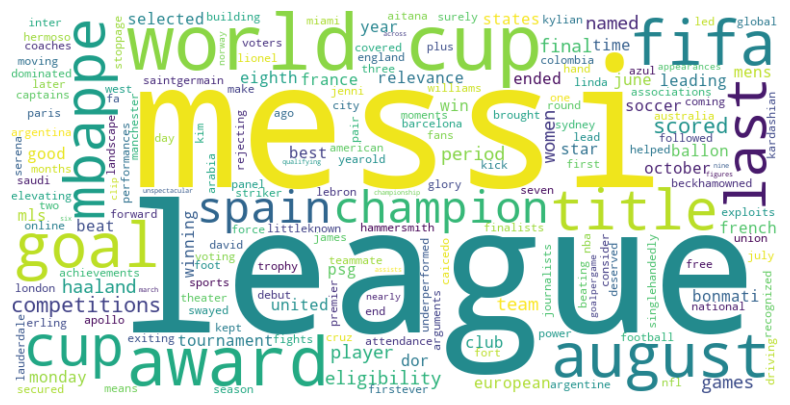

In [15]:
# Generate and display the word cloud for the basic processed content
generate_wordcloud(processed_content)

#### 5. Obtains simple word embeddings;

To show the word embeddings, I used a shorter version of text.

In [16]:
short_sentence = preprocess_text("""
    Lionel Messi is a famous football player. 
    He played for Barcelona and then moved to Paris Saint-Germain. 
    Cristiano Ronaldo, another legendary player, played for Manchester United and Real Madrid.""")

pprint(short_sentence)

# Get word embeddings
embeddings = get_word_embeddings(short_sentence)

# Display the embeddings for a specific word, e.g., "Messi"
print("Embedding for 'Messi':", embeddings['messi'])

('lionel messi famous football player played barcelona moved paris '
 'saintgermain cristiano ronaldo another legendary player played manchester '
 'united real madrid')
Embedding for 'Messi': [-0.01857421 -1.3313302   0.13859865  0.2981066  -0.28041363 -0.19373065
 -0.21824226  1.5401387   0.30568355 -0.6171419   0.70244706  0.8575625
 -1.1416485  -0.8394815  -0.2518599   1.0269384  -0.13002585 -0.4906423
 -1.3675717  -0.5041448  -1.7450333   1.4280847  -0.8167848   1.2126815
  0.8357258  -0.0637016  -0.09202659  0.9289563  -0.6281339  -0.26944077
 -0.09028965 -0.24083324  0.39908746  0.4382705  -0.48294163 -0.18113518
  0.68817323  0.41823992 -0.16143861  0.1140444  -1.0386043   1.4424006
 -0.56505954  0.71723676 -0.20004836  0.6394073  -1.0163931  -0.02652341
 -0.7062482   0.6563511  -0.723482    0.65454555  0.25372288 -0.25341797
 -1.7869662  -0.21708207  0.73994493  0.45232272  0.5200111   0.32695457
 -0.79762757 -0.36744332  0.22333485 -1.5684142  -1.887991   -1.6528974
  0.50368

The code processed the text and extracted a vector for each word using spacy small language model. These vectors are the word embeddings, which represent the semantic meaning of words in a high-dimensional space.

#### 6. Visualizes some words using word embeddings (2 dimensional or use t-SNE)

Perplexity:  5
Vectors shape:  (6, 96)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


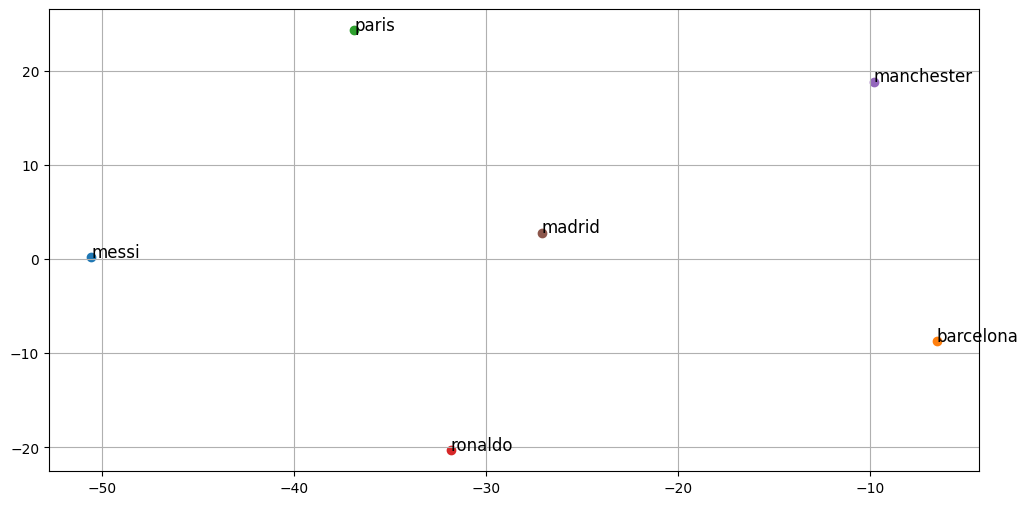

In [17]:
# Words to visualize
words_to_visualize = ["messi", "barcelona", "paris", "ronaldo", "manchester", "madrid"]

# Visualize the word embeddings
visualize_word_embeddings(embeddings, words_to_visualize)

Visualizing word embeddings after dimensionality reduction using t-SNE, we can see each point on the plot corresponds to a word, and the proximity of points indicates the similarity of their corresponding word embeddings. Here's what we can deduce from the plot:

- The words "Messi" and "Ronaldo" are relatively close to each other, which makes sense since both are the names of famous football players and are often discussed in similar contexts.
- "Barcelona" is positioned a bit away from "Messi", which could be due to the context of the text provided for the embeddings. If the text discussed Messi's move from Barcelona, this could be reflected in the positioning.
- "Madrid" is near the center, slightly closer to "Ronaldo". This could be related to Cristiano Ronaldo's past association with Real Madrid.
- "Paris" and "Manchester" are further from these players' names, which may indicate that the text provided less of a connection between these words and the individual players, or it could simply reflect their geographic and conceptual separation from individual players.

### References

* [Spacy](https://spacy.io/)
* [Benepar](https://github.com/nikitakit/self-attentive-parser)
* [Keyword Extraction](https://towardsdatascience.com/keyword-extraction-process-in-python-with-natural-language-processing-nlp-d769a9069d5c/)
* [Vector Similarity](https://spacy.io/usage/vectors-similarity)
* [NLP is Fun](https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e)